## Tokenization Practice and Simple Document Similarity

For this notebook, you have been provided the top 50 most downloaded books from Project Gutenberg over the last 90 days as text files.

In [1]:
import re
import glob
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from collections import Counter

Given a filepath, you can open the file and use the `read` method to extract the contents as a string.

For example, if we want to import the full text of War and Peace, we can do that using the following block of code.

In [2]:
filepath = '../data/books/War and Peace by graf Leo Tolstoy.txt'

with open(filepath, encoding = 'utf-8') as fi:
    book = fi.read()

You'll notice that there is some metadata at the top of the file and at the bottom of the file.

In [3]:
book[:10000]

'\ufeffThe Project Gutenberg eBook of War and Peace, by Leo Tolstoy\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: War and Peace\n\nAuthor: Leo Tolstoy\n\nTranslators: Louise and Aylmer Maude\n\nRelease Date: April, 2001 [eBook #2600]\n[Most recently updated: January 21, 2019]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: An Anonymous Volunteer and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n\n\n\n\nWAR AND PEACE\n\n\nBy Leo Tolstoy/Tolstoi\n\n\n    Contents\n\n    BOOK ONE: 1805\n\n    CHAPTER I\n\n    CHAPTER II\n\n    CH

In [4]:
book[-18420:-18000]

'scious.\n\n\n\n\n*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n\nUpdated editions will replace the previous one--the old editions will\nbe renamed.\n\nCreating the works from print editions not protected by U.S. copyright\nlaw means that no one owns a United States copyright in these works,\nso the Foundation (and you!) can copy and distribute it in the\nUnited States without permission and without paying copyright\nro'

Write some code that will remove this text at the bottom and top of the string.

**Hint:** You might want to make use of the [`re.search`](https://docs.python.org/3/library/re.html#re.search) function from the `re` library.

In [5]:
book_stripped_top_text = re.split(r'\*\*\* START OF THE PROJECT GUTENBERG EBOOK ([A-Z ]+?) \*\*\*', book)[2]
book_stripped = re.split(r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK ([A-Z ]+?) \*\*\*', book_stripped_top_text)[0]

If we want to be able to scale up our analysis to multiple books, it would be nice to have a function to use repeatedly. Write a function called `import_book` which takes as an argument a filepath and returns the contents of that file as a string with the metadata at the top and bottom removed.

In [44]:
def import_book(filepath):
    with open(filepath, encoding = 'utf-8') as fi:
        book = fi.read()
        match = re.search(r'\*\*\* START OF (?:THE|THIS) PROJECT GUTENBERG EBOOK (.+?) \*\*\*\s*(.*?)\s*\*\*\* END OF (?:THE|THIS) PROJECT GUTENBERG EBOOK (.+?) \*\*\*', book, re.DOTALL)
        if match:
            return match.group(2)
        else:
            raise ValueError('Content not found.')

Now, let's utilize our function to import all of the books into a data structure of some kind.

First, we need to be able to iterate through the list of filepaths. For this, we can use the `glob` function. This function takes as agument a pattern to match. Try it out.

In [8]:
glob.glob('../data/books/*.txt')

['../data/books\\A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens.txt',
 '../data/books\\A Modest Proposal by Jonathan Swift.txt',
 '../data/books\\A Tale of Two Cities by Charles Dickens.txt',
 '../data/books\\Adventures of Huckleberry Finn by Mark Twain.txt',
 '../data/books\\Ang _Filibusterismo_.txt',
 '../data/books\\Anna Karenina by graf Leo Tolstoy.txt',
 '../data/books\\Anne of Green Gables by L. M.  Montgomery.txt',
 '../data/books\\Anthem by Ayn Rand.txt',
 '../data/books\\Crime and Punishment by Fyodor Dostoyevsky.txt',
 '../data/books\\Don Quixote by Miguel de Cervantes Saavedra.txt',
 '../data/books\\Dracula by Bram Stoker.txt',
 '../data/books\\Dubliners by James Joyce.txt',
 '../data/books\\Emma by Jane Austen.txt',
 '../data/books\\Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley.txt',
 '../data/books\\Great Expectations by Charles Dickens.txt',
 '../data/books\\Heart of Darkness by Joseph Conrad.txt',
 '../data/books\

In [42]:
filepath = glob.glob('../data/books/*.txt')[18]
filepath

'../data/books\\Les Misérables by Victor Hugo.txt'

In [45]:
struggle_book = import_book(filepath)

It would be nice to save the title of each book without the extra pieces around it. Write code that will remove the "books/" from the front of the filepath and the ".txt" from the end. That is, we want to extract just the "Little Women by Louisa May Alcott" from the current filepath.

In [30]:
match = re.search(r"books[/\\](.+?)\.txt$", filepath)
print(match.group(1))

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens


Now, combine together the function you created and the code that you just wrote to iterate through the filepaths for the books and save the contents of each book into a dictionary whose keys are equal to the cleaned up titles.

In [46]:
def get_title(filepath):
    match = re.search(r"books[/\\](.+?)\.txt$", filepath)
    return match.group(1)

def create_dictionary_of_books(filepaths):
    book_dict = {}
    num_books = len(filepaths)
    for filepath in filepaths:
        title = get_title(filepath)
        print(f'Now getting book {title}')
        book = import_book(filepath)
        book_dict[title] = book
    print(f'Completed compiling all {num_books} books into one dictionary')
    return book_dict

In [49]:
filepaths = glob.glob('../data/books/*.txt')
books = create_dictionary_of_books(filepaths)

Now getting book A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
Now getting book A Modest Proposal by Jonathan Swift
Now getting book A Tale of Two Cities by Charles Dickens
Now getting book Adventures of Huckleberry Finn by Mark Twain
Now getting book Ang _Filibusterismo_
Now getting book Anna Karenina by graf Leo Tolstoy
Now getting book Anne of Green Gables by L. M.  Montgomery
Now getting book Anthem by Ayn Rand
Now getting book Crime and Punishment by Fyodor Dostoyevsky
Now getting book Don Quixote by Miguel de Cervantes Saavedra
Now getting book Dracula by Bram Stoker
Now getting book Dubliners by James Joyce
Now getting book Emma by Jane Austen
Now getting book Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Now getting book Great Expectations by Charles Dickens
Now getting book Heart of Darkness by Joseph Conrad
Now getting book Jane Eyre_ An Autobiography by Charlotte Brontë
Now getting book Japanese Girls and Women by Al

Now let's write some code so that we can cluster our books. In order to cluster, we'll need to be able to compute a similarity or distance between books.

A simple way to compute similarity of documents is the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) of the set of words that they conain. This metric computes the amount of overlap between two sets compared to their union. Two books which contain exactly the same words (but not necessarily in the same order or with the same frequency) will have a Jaccard similarity of 1 and two books which have no words in common will have a Jaccard similarity of 0.

**Question:** What might be some of the downsides to using Jaccard similarity to compute the similarity of two books?

In order to use this, we'll need to tokenize each book and store the results in a collection of some kind. Since we are interested in which words appear but not necessarily in what order or how frequently, we can make use of a [set](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset). A set is similar to a list, but the order of the contents does not matter and a set cannot contain duplicates.

For practice, let's grab one of our books.

A downside to this method is that two books may have most common words in common, but are about wildly different contexts because meaning comes from the order of words and the special words, not just everyday words

In [50]:
book = books['Little Women by Louisa May Alcott']

Write some code which tokenizes Little Women and stores the tokens it contains in a set. It is up to you to decide exactly how you want to tokenize or what you want to count as a token.

Once you are happy with your tokenization method, convert it into a function named `tokenize_book` which takes in a string and returns a set of tokens.

In [53]:
book_tokenized = regexp_tokenize(book, r'\w+')
print(book_tokenized[:100])

['Little', 'Women', 'by', 'Louisa', 'May', 'Alcott', 'Contents', 'PART', '1', 'CHAPTER', 'ONE', 'PLAYING', 'PILGRIMS', 'CHAPTER', 'TWO', 'A', 'MERRY', 'CHRISTMAS', 'CHAPTER', 'THREE', 'THE', 'LAURENCE', 'BOY', 'CHAPTER', 'FOUR', 'BURDENS', 'CHAPTER', 'FIVE', 'BEING', 'NEIGHBORLY', 'CHAPTER', 'SIX', 'BETH', 'FINDS', 'THE', 'PALACE', 'BEAUTIFUL', 'CHAPTER', 'SEVEN', 'AMY', 'S', 'VALLEY', 'OF', 'HUMILIATION', 'CHAPTER', 'EIGHT', 'JO', 'MEETS', 'APOLLYON', 'CHAPTER', 'NINE', 'MEG', 'GOES', 'TO', 'VANITY', 'FAIR', 'CHAPTER', 'TEN', 'THE', 'P', 'C', 'AND', 'P', 'O', 'CHAPTER', 'ELEVEN', 'EXPERIMENTS', 'CHAPTER', 'TWELVE', 'CAMP', 'LAURENCE', 'CHAPTER', 'THIRTEEN', 'CASTLES', 'IN', 'THE', 'AIR', 'CHAPTER', 'FOURTEEN', 'SECRETS', 'CHAPTER', 'FIFTEEN', 'A', 'TELEGRAM', 'CHAPTER', 'SIXTEEN', 'LETTERS', 'CHAPTER', 'SEVENTEEN', 'LITTLE', 'FAITHFUL', 'CHAPTER', 'EIGHTEEN', 'DARK', 'DAYS', 'CHAPTER', 'NINETEEN', 'AMY', 'S', 'WILL']


In [56]:
def tokenize_book(str):
    return set(regexp_tokenize(str, r'\w+'))

Now, write a function `jaccard` which takes in two sets of tokens and returns the Jaccard similarities between them. **Hint:** Python sets have `intersection` and `union` methods.

In [58]:
token_set1 = tokenize_book(books['Little Women by Louisa May Alcott'])
token_set2 = tokenize_book(books['Moby Dick; Or, The Whale by Herman Melville'])

intersect_size = len(token_set1.intersection(token_set2))
union_size = len(token_set1.union(token_set2))

print(intersect_size/union_size)

0.2835970024979184


In [59]:
def jaccard(token_set1, token_set2):
    intersect_size = len(token_set1.intersection(token_set2))
    union_size = len(token_set1.union(token_set2))

    return intersect_size/union_size

Is Little Women more similar (using Jaccard Similarity) to Heart of Darkness or Anthem?

In [61]:
little_women_token_set = tokenize_book(books['Little Women by Louisa May Alcott'])
heart_of_darkness_token_set = tokenize_book(books['Heart of Darkness by Joseph Conrad'])
anthem_token_set = tokenize_book(books['Anthem by Ayn Rand'])

print(f'Similarity between Little Women and Heart of Darkness: {jaccard(little_women_token_set, heart_of_darkness_token_set)}')

Similarity between Little Women and Heart of Darkness: 0.25484148615693586


In [62]:
print(f'Similarity between Little Women and Anthem: {jaccard(little_women_token_set, anthem_token_set)}')

Similarity between Little Women and Anthem: 0.13454634464751958


Let's create another dictionary called `book_tokens` that contains the title of each book as a key and the tokenized version of the book as values.

In [70]:
def create_book_tokens(books:dict):
    book_tokens = {}
    for title, book in books.items():
        print(f'Tokenizing {title}...')
        token_set = tokenize_book(book)
        book_tokens[title] = token_set
    print('Completed tokenizing all books.')
    return book_tokens

In [71]:
book_tokens = create_book_tokens(books)

Tokenizing A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens...
Tokenizing A Modest Proposal by Jonathan Swift...
Tokenizing A Tale of Two Cities by Charles Dickens...
Tokenizing Adventures of Huckleberry Finn by Mark Twain...
Tokenizing Ang _Filibusterismo_...
Tokenizing Anna Karenina by graf Leo Tolstoy...
Tokenizing Anne of Green Gables by L. M.  Montgomery...
Tokenizing Anthem by Ayn Rand...
Tokenizing Crime and Punishment by Fyodor Dostoyevsky...
Tokenizing Don Quixote by Miguel de Cervantes Saavedra...
Tokenizing Dracula by Bram Stoker...
Tokenizing Dubliners by James Joyce...
Tokenizing Emma by Jane Austen...
Tokenizing Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley...
Tokenizing Great Expectations by Charles Dickens...
Tokenizing Heart of Darkness by Joseph Conrad...
Tokenizing Jane Eyre_ An Autobiography by Charlotte Brontë...
Tokenizing Japanese Girls and Women by Alice Mabel Bacon...
Tokenizing Les Misérables by Victor Hu

Using this, let's create a distance matrix for our books using the jaccard function above. **Note:** You created a function for jaccard _similarity_. This can be converted to a **distance** by subtracting the similarity score from 1.

In [92]:
dists = np.zeros(shape = (len(book_tokens), len(book_tokens)))

Now, fill in the distance matrix so that in the i,j spot you have one minus the jaccard similarity of the ith and jth books.

In [109]:
def create_dist_matrix(book_tokens):
    dists = np.zeros(shape = (len(book_tokens), len(book_tokens)))
    for i, token_set_i in enumerate(book_tokens.values()):
        for j, token_set_j in enumerate(book_tokens.values()):
            dists[i][j] = 1 - jaccard(set(token_set_i), set(token_set_j))
    return dists

In [110]:
dists = create_dist_matrix(book_tokens)
print(dists)

[[0.         0.88184664 0.73031463 ... 0.77767903 0.82135758 0.73269417]
 [0.88184664 0.         0.92385044 ... 0.92911767 0.95210232 0.91971525]
 [0.73031463 0.92385044 0.         ... 0.6845665  0.67046216 0.62805042]
 ...
 [0.77767903 0.92911767 0.6845665  ... 0.         0.69759046 0.68918266]
 [0.82135758 0.95210232 0.67046216 ... 0.69759046 0.         0.68653802]
 [0.73269417 0.91971525 0.62805042 ... 0.68918266 0.68653802 0.        ]]


Once we have our distance matrix, we can compute a **dendogram**. 

A dendogram is a way to visualize a hierarchical clustering of a dataset. You can read more about it [here](https://www.statisticshowto.com/hierarchical-clustering/).

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

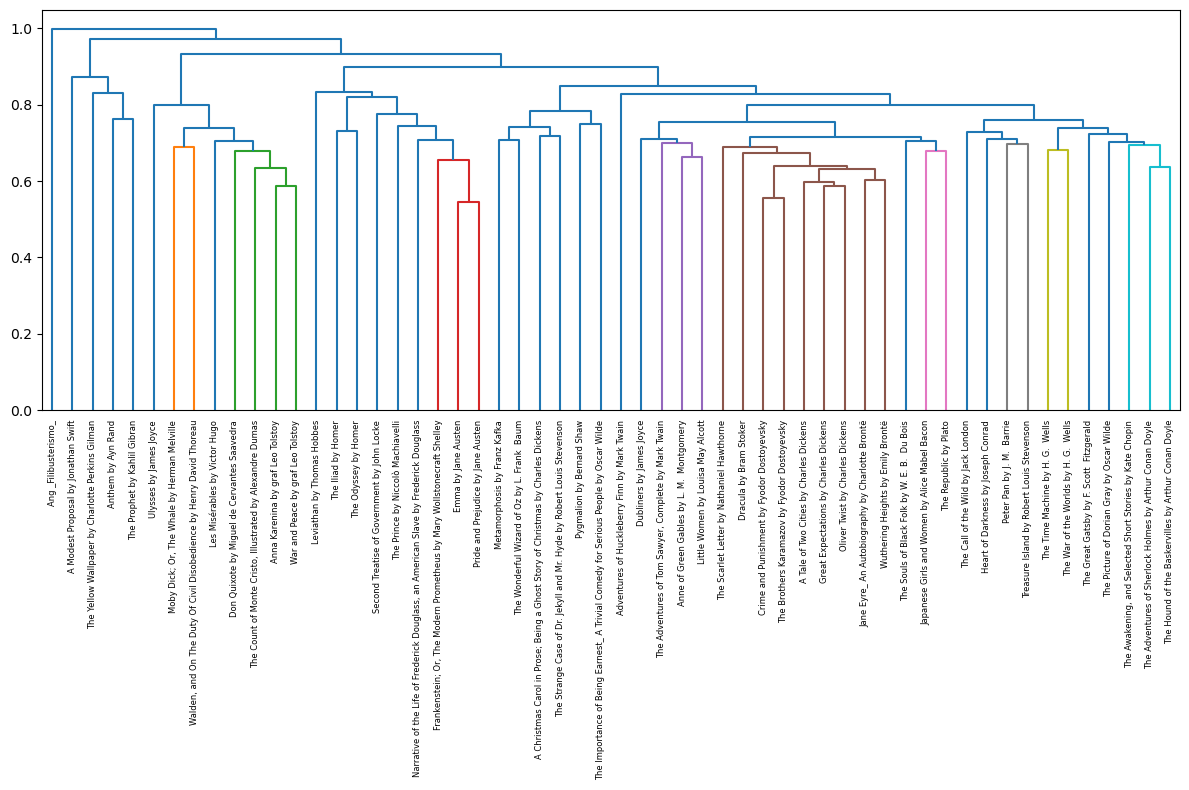

In [114]:
mergings = linkage(squareform(dists), method='complete')

plt.figure(figsize = (12,8))
dendrogram(mergings,
           labels = list(book_tokens.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);

plt.tight_layout()
plt.savefig('images/dendogram_complete_jaccard.png', transparent=False, facecolor='white', dpi = 150);

**Bonus Material** Jaccard Similarity does not account for the frequency that each word is used, only whether or not it is used.

We might be better off using the **cosine similarity** as a way to measure the similarity of two books.

Create a dataframe named `books_df` where each row corresponds to a book and each column corresponds to a word. It should count the number of times the word appears in that book (including zero). Use the book title as the index of this dataframe.

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(books.values())

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)
print(tfidf_matrix.shape)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)


[[1.         0.05723113 0.12282558 ... 0.13518556 0.10820042 0.08507574]
 [0.05723113 1.         0.11356189 ... 0.20178469 0.0940685  0.07794019]
 [0.12282558 0.11356189 1.         ... 0.29095377 0.22473443 0.18526095]
 ...
 [0.13518556 0.20178469 0.29095377 ... 1.         0.27090912 0.19938222]
 [0.10820042 0.0940685  0.22473443 ... 0.27090912 1.         0.15994887]
 [0.08507574 0.07794019 0.18526095 ... 0.19938222 0.15994887 1.        ]]
(56, 95362)
['00' '000' '0009' ... 'ὦς' 'ῥα' 'ῥῶγες']


In [ ]:
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()
little_women_counter = Counter([wnl.lemmatize(x.lower()) for x in regexp_tokenize(books['Little Women by Louisa May Alcott'], r'[-\'\w]+') if x.lower() not in stop_words])
len(little_women_counter)

9684

In [149]:
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()
def create_book_counter(book):
    return Counter([wnl.lemmatize(x.lower()) for x in regexp_tokenize(book, r'[-\'\w]+') if x.lower() not in stop_words])

In [152]:
little_women_book = books['Little Women by Louisa May Alcott']
anthem_book = books['Anthem by Ayn Rand']

little_women_counter = create_book_counter(little_women_book)
anthem_counter = create_book_counter(anthem_book)

In [155]:
def create_dict_from_counter(counter):
    dict = {}
    for word, frequency in counter.items():
        dict[word] = frequency
    return dict

In [157]:
lw_dict = create_dict_from_counter(little_women_counter)
anthem_dict = create_dict_from_counter(anthem_counter)

In [160]:
test_df = pd.DataFrame(
    anthem_dict,
    lw_dict
)
test_df.head()

,anthem,ayn,rand,content,part,one,two,three,four,five,...,remain,awaken,break,fort,louder,raze,capital,beacon,sacred,ego
little,1,1,1,1,26,127,26,15,3,8,...,1,1,2,2,1,1,1,1,1,1
woman,1,1,1,1,26,127,26,15,3,8,...,1,1,2,2,1,1,1,1,1,1
louisa,1,1,1,1,26,127,26,15,3,8,...,1,1,2,2,1,1,1,1,1,1
may,1,1,1,1,26,127,26,15,3,8,...,1,1,2,2,1,1,1,1,1,1
alcott,1,1,1,1,26,127,26,15,3,8,...,1,1,2,2,1,1,1,1,1,1


In [131]:
books_df = pd.DataFrame(
    cosine_sim
)

books_df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.000000,0.057231,0.122826,0.118684,0.000245,0.104429,0.065705,0.113395,0.095592,0.085402,...,0.081658,0.130165,0.105301,0.066858,0.114038,0.148854,0.151938,0.135186,0.108200,0.085076
1,0.057231,1.000000,0.113562,0.107720,0.000081,0.087283,0.054976,0.121568,0.089066,0.086746,...,0.069403,0.121867,0.101357,0.061767,0.113168,0.125990,0.149098,0.201785,0.094068,0.077940
2,0.122826,0.113562,1.000000,0.235532,0.000841,0.207782,0.124252,0.237938,0.196619,0.168893,...,0.194238,0.264745,0.225520,0.128151,0.226349,0.307549,0.325441,0.290954,0.224734,0.185261
3,0.118684,0.107720,0.235532,1.000000,0.000865,0.217131,0.172561,0.194216,0.225576,0.195284,...,0.141799,0.262655,0.224202,0.133080,0.302999,0.456402,0.347261,0.310685,0.219356,0.189755
4,0.000245,0.000081,0.000841,0.000865,1.000000,0.000330,0.000129,0.000232,0.000465,0.000662,...,0.003492,0.000435,0.000424,0.000152,0.000095,0.001337,0.005178,0.002345,0.001023,0.001142
